In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [3]:
glass_data=pd.read_csv(r"C:\Users\dell\Desktop\assignment\KNN-Algorithm-ML-Glass_data-master\glass.csv")

In [4]:
glass_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## EDA

In [5]:
glass_data.shape

(214, 10)

In [6]:
glass_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
glass_data.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [8]:
glass_data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [9]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [10]:
glass_data[glass_data.duplicated()]


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [11]:
glass_data1=glass_data.drop_duplicates()

In [12]:
glass_data1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [13]:
glass_data1.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


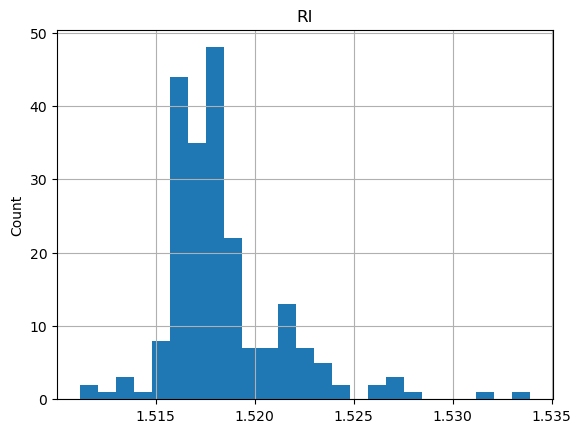

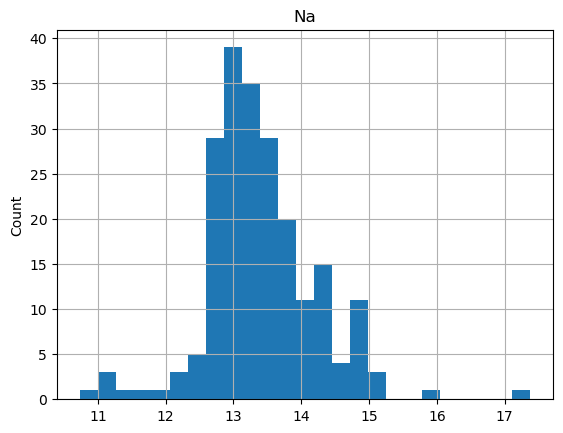

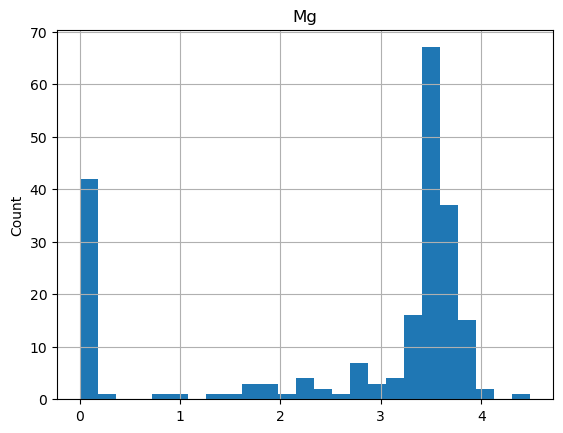

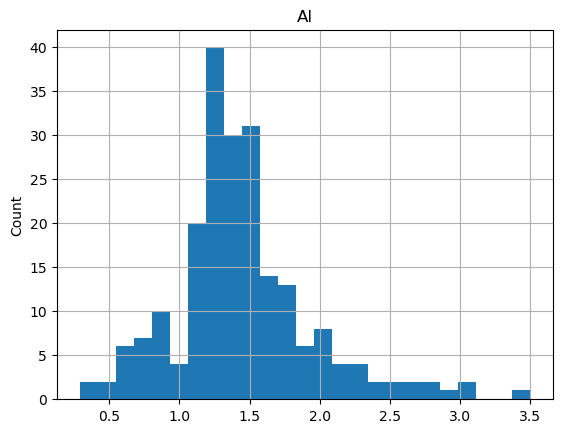

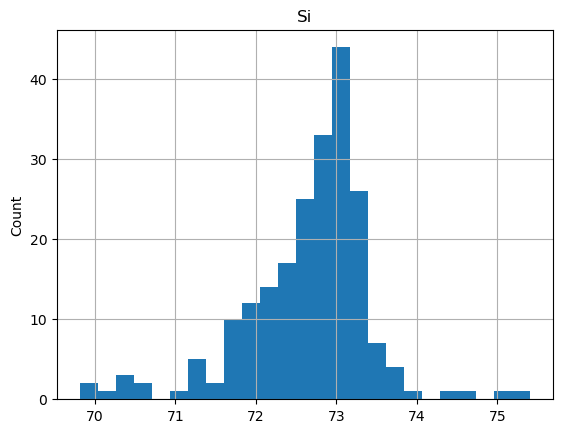

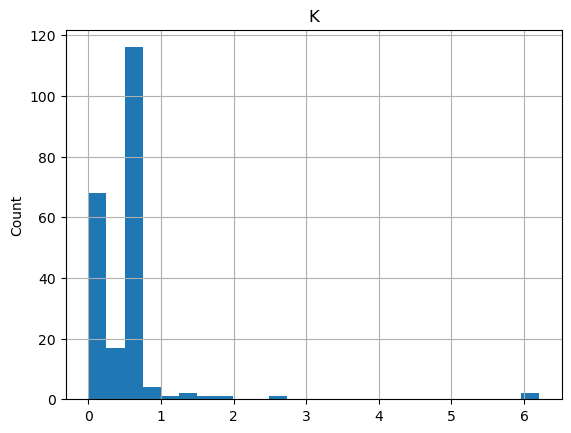

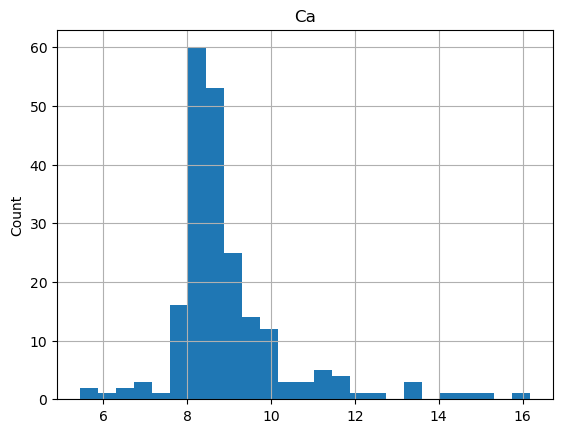

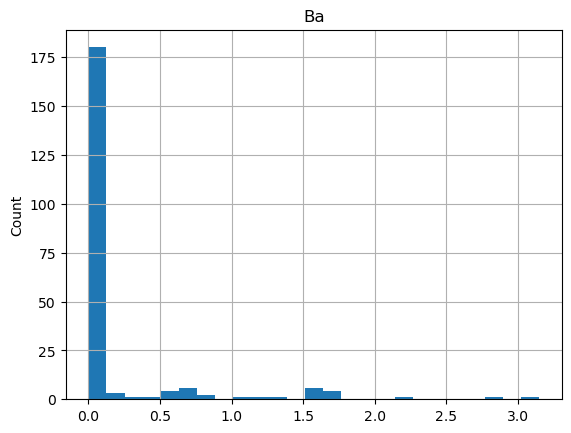

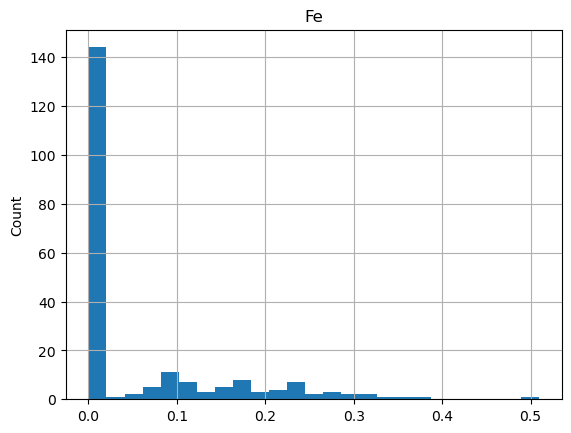

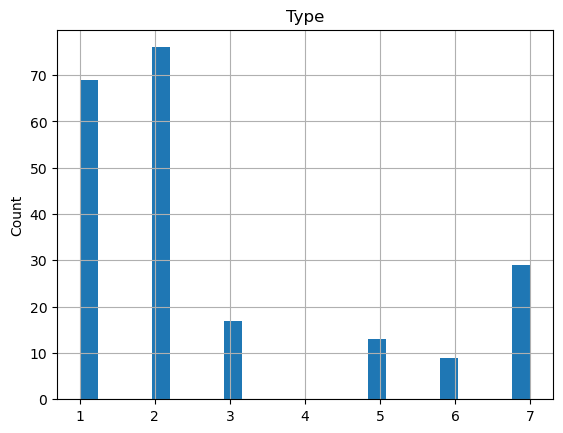

In [14]:
## histogram
for feature in glass_data1.columns:
    data=glass_data1.copy()
    glass_data1[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

<AxesSubplot:>

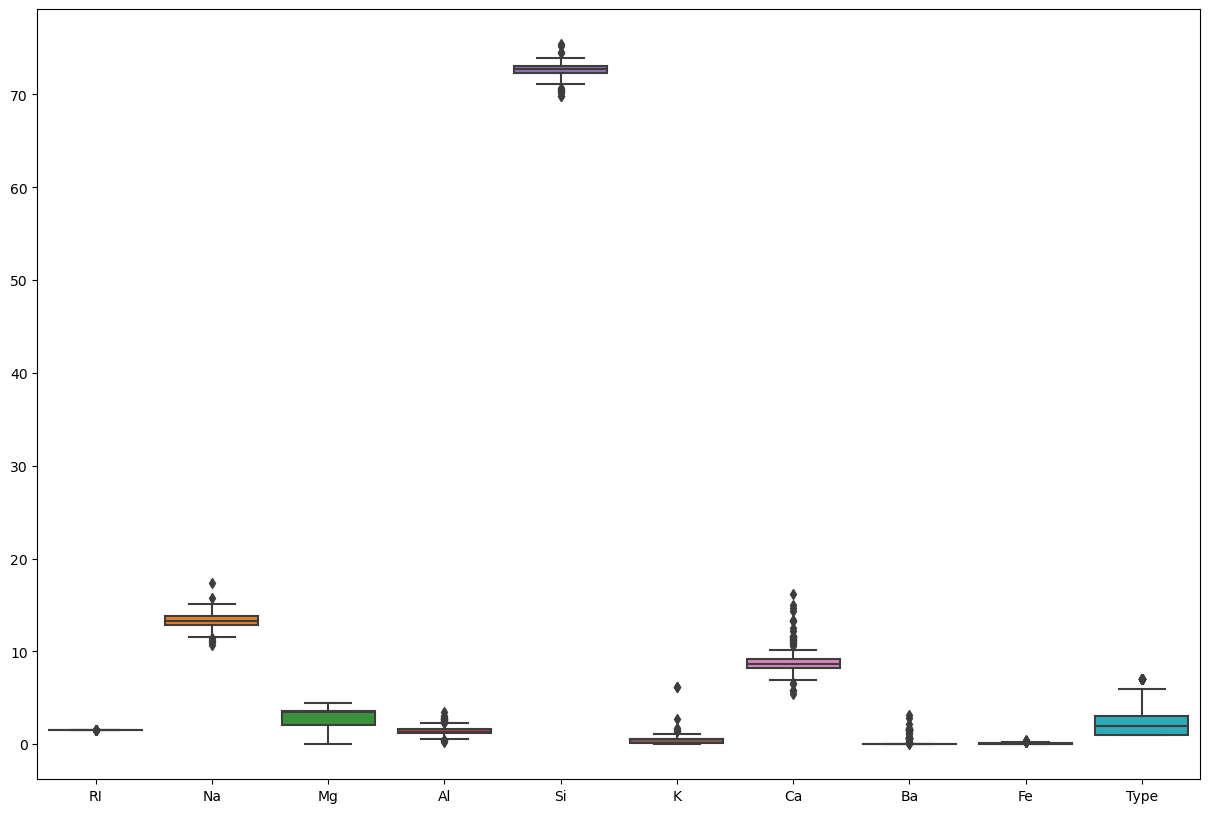

In [15]:
## boxplot
plt.figure(figsize=(15,10))
sns.boxplot(data=(glass_data1))

## VISUALIZATION

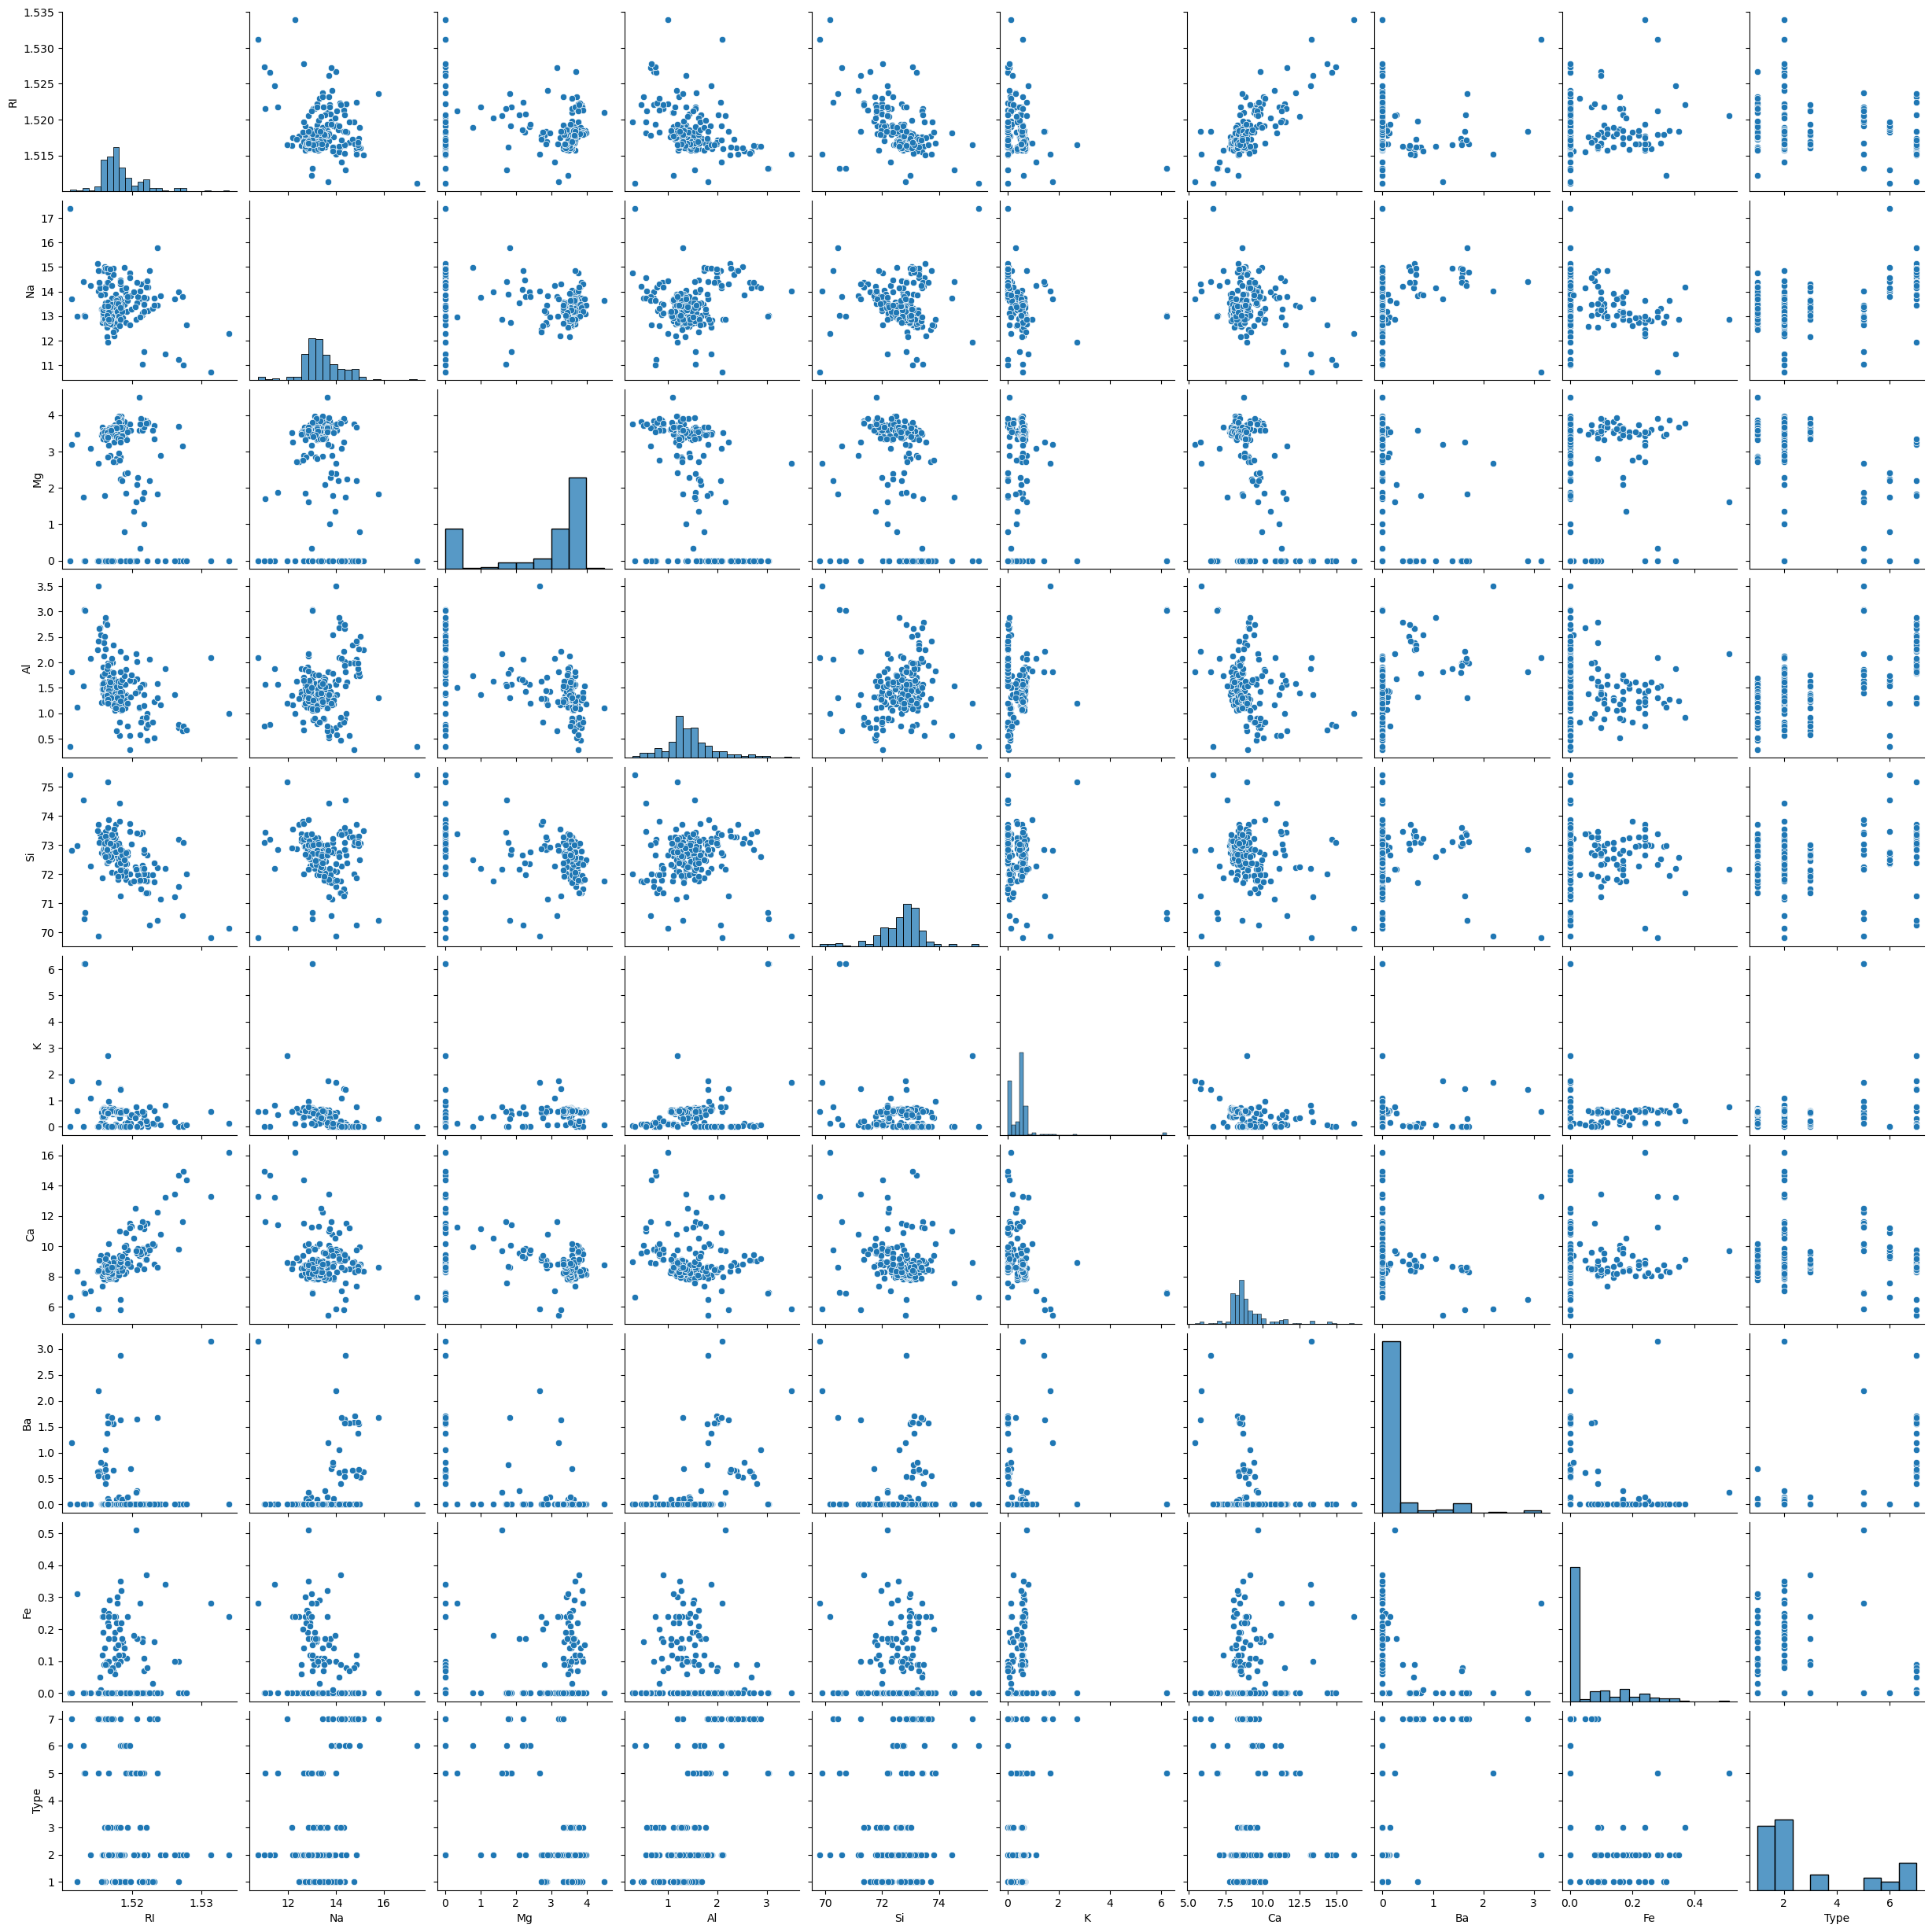

In [16]:
sns.pairplot(glass_data1)

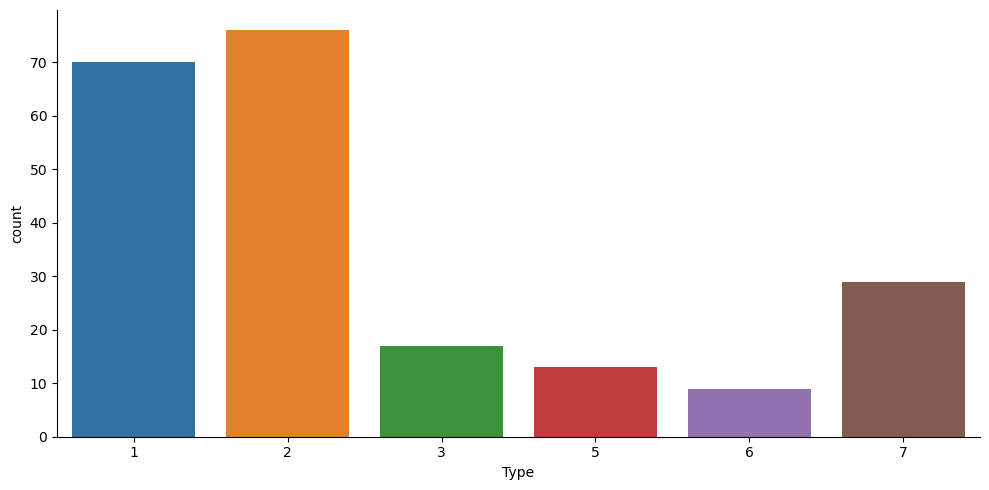

In [17]:
## barplot
sns.factorplot('Type',data = glass_data,kind = 'count',aspect= 2,size = 5)

In [18]:
glass_data1.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


## standardization on glass data

In [19]:
x = glass_data1.drop(columns = 'Type',axis = 1)
y = glass_data1[['Type']]

In [20]:
x.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [21]:
y.head()

,Type
0,1
1,1
2,1
3,1
4,1


In [22]:
std_data = StandardScaler()
scaler_x = std_data.fit_transform(x)
x_data = pd.DataFrame(scaler_x,columns = x.columns)
x_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301
...,...,...,...,...,...,...,...,...,...
208,-0.699888,0.903249,-1.860172,2.891336,-0.058368,-0.642789,0.158812,1.778672,-0.588301
209,-0.494986,1.860605,-1.860172,1.092483,0.524398,-0.765554,-0.389506,2.844912,-0.588301
210,0.760865,1.173272,-1.860172,1.153118,0.990612,-0.765554,-0.361387,2.945501,-0.588301
211,-0.607351,1.197820,-1.860172,0.991424,1.236668,-0.765554,-0.333268,2.804676,-0.588301


In [23]:
x_data.mean()

RI   -1.207381e-14
Na   -3.444298e-15
Mg   -3.544374e-17
Al    8.235457e-17
Si    1.006498e-14
K     1.188408e-16
Ca   -1.209127e-15
Ba    7.297241e-16
Fe   -1.459448e-16
dtype: float64

In [24]:
x_data.std()

RI    1.002356
Na    1.002356
Mg    1.002356
Al    1.002356
Si    1.002356
K     1.002356
Ca    1.002356
Ba    1.002356
Fe    1.002356
dtype: float64

## Model Training

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y,test_size=0.30,random_state = 0)

In [50]:
## split the train data set into cross validation train and cross validation test
x_train1, x_cv, y_train1, y_cv =train_test_split(x_train, y_train, test_size=0.20)


In [34]:
x_train.shape,y_train.shape

((149, 9), (149, 1))

In [35]:
x_test.shape,y_test.shape

((64, 9), (64, 1))

## Model Building

In [39]:
knn_model=KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')

In [40]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [41]:
# training data
y_train_pred = knn_model.predict(x_train)

In [42]:
accuracy_score(y_train,y_train_pred)

0.7315436241610739

In [43]:
# testing data
y_test_pred = knn_model.predict(x_test)

In [44]:
accuracy_score(y_test,y_test_pred)

0.65625

In [46]:
cv_score = []
for i in range(1,26):
    knn = KNeighborsClassifier(n_neighbors=i,metric='manhattan')
    cv_scores = cross_val_score(estimator=knn,X = x_data, y=y,cv=10)
    cv_score.append(cv_scores.mean())
    print('neighbours',i,cv_scores.mean())
    

neighbours 1 0.6666666666666667
neighbours 2 0.6707792207792208
neighbours 3 0.6662337662337663
neighbours 4 0.6331168831168832
neighbours 5 0.6571428571428571
neighbours 6 0.632900432900433
neighbours 7 0.6287878787878789
neighbours 8 0.6186147186147185
neighbours 9 0.6285714285714287
neighbours 10 0.6333333333333334
neighbours 11 0.6335497835497836
neighbours 12 0.6525974025974026
neighbours 13 0.6525974025974026
neighbours 14 0.6238095238095238
neighbours 15 0.6285714285714286
neighbours 16 0.6285714285714286
neighbours 17 0.6192640692640693
neighbours 18 0.6192640692640693
neighbours 19 0.6283549783549784
neighbours 20 0.6383116883116883
neighbours 21 0.6476190476190475
neighbours 22 0.6335497835497835
neighbours 23 0.6380952380952382
neighbours 24 0.629004329004329
neighbours 25 0.6285714285714287


In [49]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=5


[[17  3  0  0  0  0]
 [ 6 17  0  2  0  0]
 [ 6  2  0  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  1  0  0  0  1]
 [ 0  0  0  0  0  7]]


              precision    recall  f1-score   support

           1       0.59      0.85      0.69        20
           2       0.71      0.68      0.69        25
           3       0.00      0.00      0.00         8
           5       0.33      0.50      0.40         2
           6       0.00      0.00      0.00         2
           7       0.88      1.00      0.93         7

    accuracy                           0.66        64
   macro avg       0.42      0.51      0.45        64
weighted avg       0.57      0.66      0.60        64



## ANOTHER MODEL


In [51]:
for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i) 

    # fitting the model on train dataset
    knn.fit(x_train1, y_train1)

    # predict the response(predicd = predicted y_cv) on the 
    # crossvalidation dataset(X_cv) on the above trained model on training data with K = i
    pred = knn.predict(x_cv)

    # evaluate CV accuracy on K = i
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))


CV accuracy for k = 1 is 66%

CV accuracy for k = 3 is 66%

CV accuracy for k = 5 is 63%

CV accuracy for k = 7 is 60%

CV accuracy for k = 9 is 63%

CV accuracy for k = 11 is 63%

CV accuracy for k = 13 is 56%

CV accuracy for k = 15 is 63%

CV accuracy for k = 17 is 63%

CV accuracy for k = 19 is 60%

CV accuracy for k = 21 is 53%

CV accuracy for k = 23 is 50%

CV accuracy for k = 25 is 50%

CV accuracy for k = 27 is 50%

CV accuracy for k = 29 is 50%


## Retraining with the optimal value of K received using simple cross validation and calculating test accuracy

In [52]:
# Retrain the model with tuned hyperparmeter Koptimal (Koptimal = K where accuracy is max in CV) 
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train1,y_train1)
pred = knn.predict(x_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 1 is %d%%' % (acc))


****Test accuracy for k = 1 is 68%


### 10 fold Cross vaildation

In [53]:
# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty dict that will hold cv scores
cv_scores = {}

# perform CV = 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train1, y_train1, cv=10, scoring='accuracy')
    cv_scores[k] = scores.mean()

print(cv_scores)
print("Optimal K value:")

optimal_k = max(cv_scores, key=cv_scores.get)
print(optimal_k)

{1: 0.6962121212121213, 3: 0.6628787878787878, 5: 0.6378787878787879, 7: 0.5969696969696969, 9: 0.5795454545454545, 11: 0.5803030303030303, 13: 0.5878787878787879, 15: 0.5712121212121213, 17: 0.5628787878787879, 19: 0.5628787878787879, 21: 0.5462121212121213, 23: 0.5537878787878787, 25: 0.5272727272727271, 27: 0.5621212121212121, 29: 0.5545454545454545, 31: 0.5371212121212121, 33: 0.48560606060606065, 35: 0.48636363636363633, 37: 0.4446969696969697, 39: 0.48636363636363633, 41: 0.4446969696969697, 43: 0.42803030303030304, 45: 0.4204545454545454, 47: 0.3507575757575757, 49: 0.3265151515151515}
Optimal K value:
1


## Retraining with the optimal value of K received using 10 fold cross validation and calculating test accuracy

In [54]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(x_train1, y_train1)

# predict the response
pred = knn_optimal.predict(x_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))



The accuracy of the knn classifier for k = 1 is 68.750000%


### Classification report and Confusion Matrix

In [55]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[19  1  0  0  0  0]
 [ 6 16  1  1  1  0]
 [ 3  4  1  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  1  0  0  1  0]
 [ 1  0  0  0  0  6]]


              precision    recall  f1-score   support

           1       0.66      0.95      0.78        20
           2       0.70      0.64      0.67        25
           3       0.50      0.12      0.20         8
           5       0.50      0.50      0.50         2
           6       0.50      0.50      0.50         2
           7       1.00      0.86      0.92         7

    accuracy                           0.69        64
   macro avg       0.64      0.60      0.59        64
weighted avg       0.68      0.69      0.66        64



In [56]:
### optimal value of knn model is k = 1 with 69% accuracy